# Project 2 - Autonomous Driving

By Laura Madrid & Lucas Noritomi-Hartwig

Autonomous driving is one of the major research venues these days. A lot of 
effort is devoted to it by both the academics as well as industry. In this 
project you'll familiarize yourself with some of the most important problems 
that arise in the field of autonomous driving.

The input to your algorithm is a stereo image pair and the camera parameters. 
You will also have available a set of training images where the cars have been 
annotated with 2D bounding boxes as well as viewpoint. Furthermore, you'll have 
a few images where the road has been annotated. Here are the tasks to solve:

In [7]:
# Import required packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

In [11]:
def sum_of_abs_diff(pixel_vals_1, pixel_vals_2):
    """
    Calculate the sum of absolute difference between individual pixels.
    
    Args:
        pixel_vals_1 (numpy.ndarray): Pixel block from left image.
        pixel_vals_2 (numpy.ndarray): Pixel block from right image.
        
    Returns:
        float: Sum of absolute differences between the two pixel blocks.
    """
    if pixel_vals_1.shape != pixel_vals_2.shape:
        return -1

    return np.sum(np.abs(pixel_vals_1 - pixel_vals_2))

In [12]:
def compare_blocks(y, x, block_left, right_array, block_size=5, search_block_size=56):
    """
    Compare a block from the left image with blocks in the right image to find the best match.
    
    Args:
        y (int): Row index of the left block.
        x (int): Column index of the left block.
        block_left (numpy.ndarray): Pixel block from the left image.
        right_array (numpy.ndarray): Entire right image.
        block_size (int): Size of the block. Defaults to 5.
        search_block_size (int): Size of the search block in the right image. Defaults to 56.

    Returns:
        tuple: (y, x) indices of the best matching block in the right image.
    """
    # Define search range for the right image
    x_min = max(0, x - search_block_size)
    x_max = min(right_array.shape[1], x + search_block_size)

    # Initialize the minimum sum of absolute differences (SAD) and its index
    first = True
    min_sad = None
    min_index = None

    # Iterate through the search range in the right image
    for x_search in range(x_min, x_max):
        block_right = right_array[y:y + block_size, x_search:x_search + block_size]
        sad = sum_of_abs_diff(block_left, block_right)

        # Update the minimum SAD and its index if found
        if first:
            min_sad = sad
            min_index = (y, x_search)
            first = False
        elif sad < min_sad:
            min_sad = sad
            min_index = (y, x_search)

    return min_index

In [13]:
def calculate_disparity_map(left_array, right_array, block_size=7, search_block_size=56):
    """
    Calculate the disparity map between two images using block matching.

    Args:
        left_array (numpy.ndarray): Left image.
        right_array (numpy.ndarray): Right image.
        block_size (int): Size of the block. Defaults to 7.
        search_block_size (int): Size of the search block. Defaults to 56.
    Returns:
        numpy.ndarray: Disparity map.
    """
    h, w = left_array.shape
    disparity_map = np.zeros((h, w))

    # Iterate over the entire image except for the borders
    for y in tqdm(range(block_size, h - block_size)):
        for x in range(block_size, w - block_size):
            block_left = left_array[y:y + block_size, x:x + block_size]
            min_index = compare_blocks(y, x, block_left, right_array, block_size, search_block_size)
            disparity_map[y, x] = abs(min_index[1] - x)

    return disparity_map

In [14]:
# Visualize the disparity map
def visualize_disparity_map(disparity_map):
    """
    Visualizes the disparity map using a color map.

    Args:
        disparity_map (numpy.ndarray): The disparity map to visualize.
    """
    plt.figure(figsize=(10, 8))
    plt.imshow(disparity_map, cmap='jet')  # Use a color map of your choice
    plt.colorbar(label='Disparity')
    plt.title('Disparity Map')
    plt.show()

100%|██████████| 361/361 [03:32<00:00,  1.70it/s]


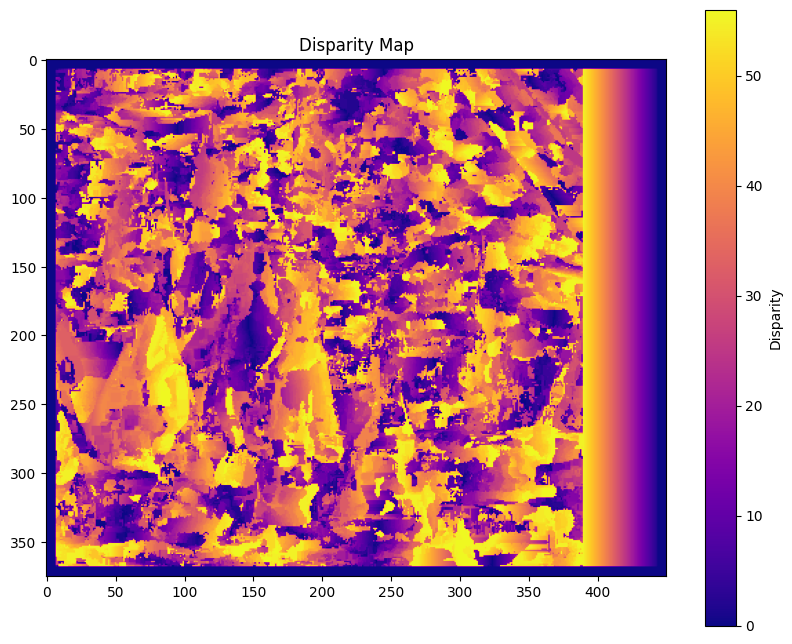

In [15]:
# Load images
left_img = cv2.imread('left.png', cv2.IMREAD_GRAYSCALE)
right_img = cv2.imread('right.png', cv2.IMREAD_GRAYSCALE)

# Set block size and search range
block_size = 7
search_range = 56

# Compute disparity map
disparity_map = calculate_disparity_map(left_img, right_img, block_size, search_range)

# Visualize the computed disparity map
visualize_disparity_map(disparity_map)

In [ ]:
def compute_disparity(image_1, image_2):
    pass